## Explore Dry Beans Classification using models which will help to recognize the type of beans.

### Steps involved in the process

1. Reading the Data
2. Understanding the Data
3. Exploratory Data Analysis
4. Splitting the Data
5. Training and Testing
6. Modeling
7. Accuracy



## Data preparation and cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv("Dry_Bean_Dataset.csv")
data.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395  610291.00       208.178117       173.888747      1.197191   
1  28734  638018.00       200.524796       182.734419      1.097356   
2  29380     624.11       212.826130       175.931143      1.209713   
3  30008  645884.00       210.557999       182.516516      1.153638   
4  30140  620134.00       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [4]:
data.duplicated().sum()

68

In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13543 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13543 non-null  int64  
 1   Perimeter        13543 non-null  float64
 2   MajorAxisLength  13543 non-null  float64
 3   MinorAxisLength  13543 non-null  float64
 4   AspectRation     13543 non-null  float64
 5   Eccentricity     13543 non-null  float64
 6   ConvexArea       13543 non-null  int64  
 7   EquivDiameter    13543 non-null  float64
 8   Extent           13543 non-null  float64
 9   Solidity         13543 non-null  float64
 10  roundness        13543 non-null  float64
 11  Compactness      13543 non-null  float64
 12  ShapeFactor1     13543 non-null  float64
 13  ShapeFactor2     13543 non-null  float64
 14  ShapeFactor3     13543 non-null  float64
 15  ShapeFactor4     13543 non-null  float64
 16  Class            13543 non-null  object 
dtypes: float64(1

## After dropping the duplicate columns finally we have a data set with 13543 rows and 17 columns

In [8]:
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [9]:
data.nunique()

Area               12011
Perimeter          13351
MajorAxisLength    13543
MinorAxisLength    13543
AspectRation       13543
Eccentricity       13543
ConvexArea         12066
EquivDiameter      12011
Extent             13535
Solidity           13526
roundness          13543
Compactness        13543
ShapeFactor1       13543
ShapeFactor2       13543
ShapeFactor3       13543
ShapeFactor4       13543
Class                  7
dtype: int64

In [10]:
data.Class.unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [11]:
data.Class.value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [12]:
x=data.Class.value_counts().values
y=data.Class.value_counts().index

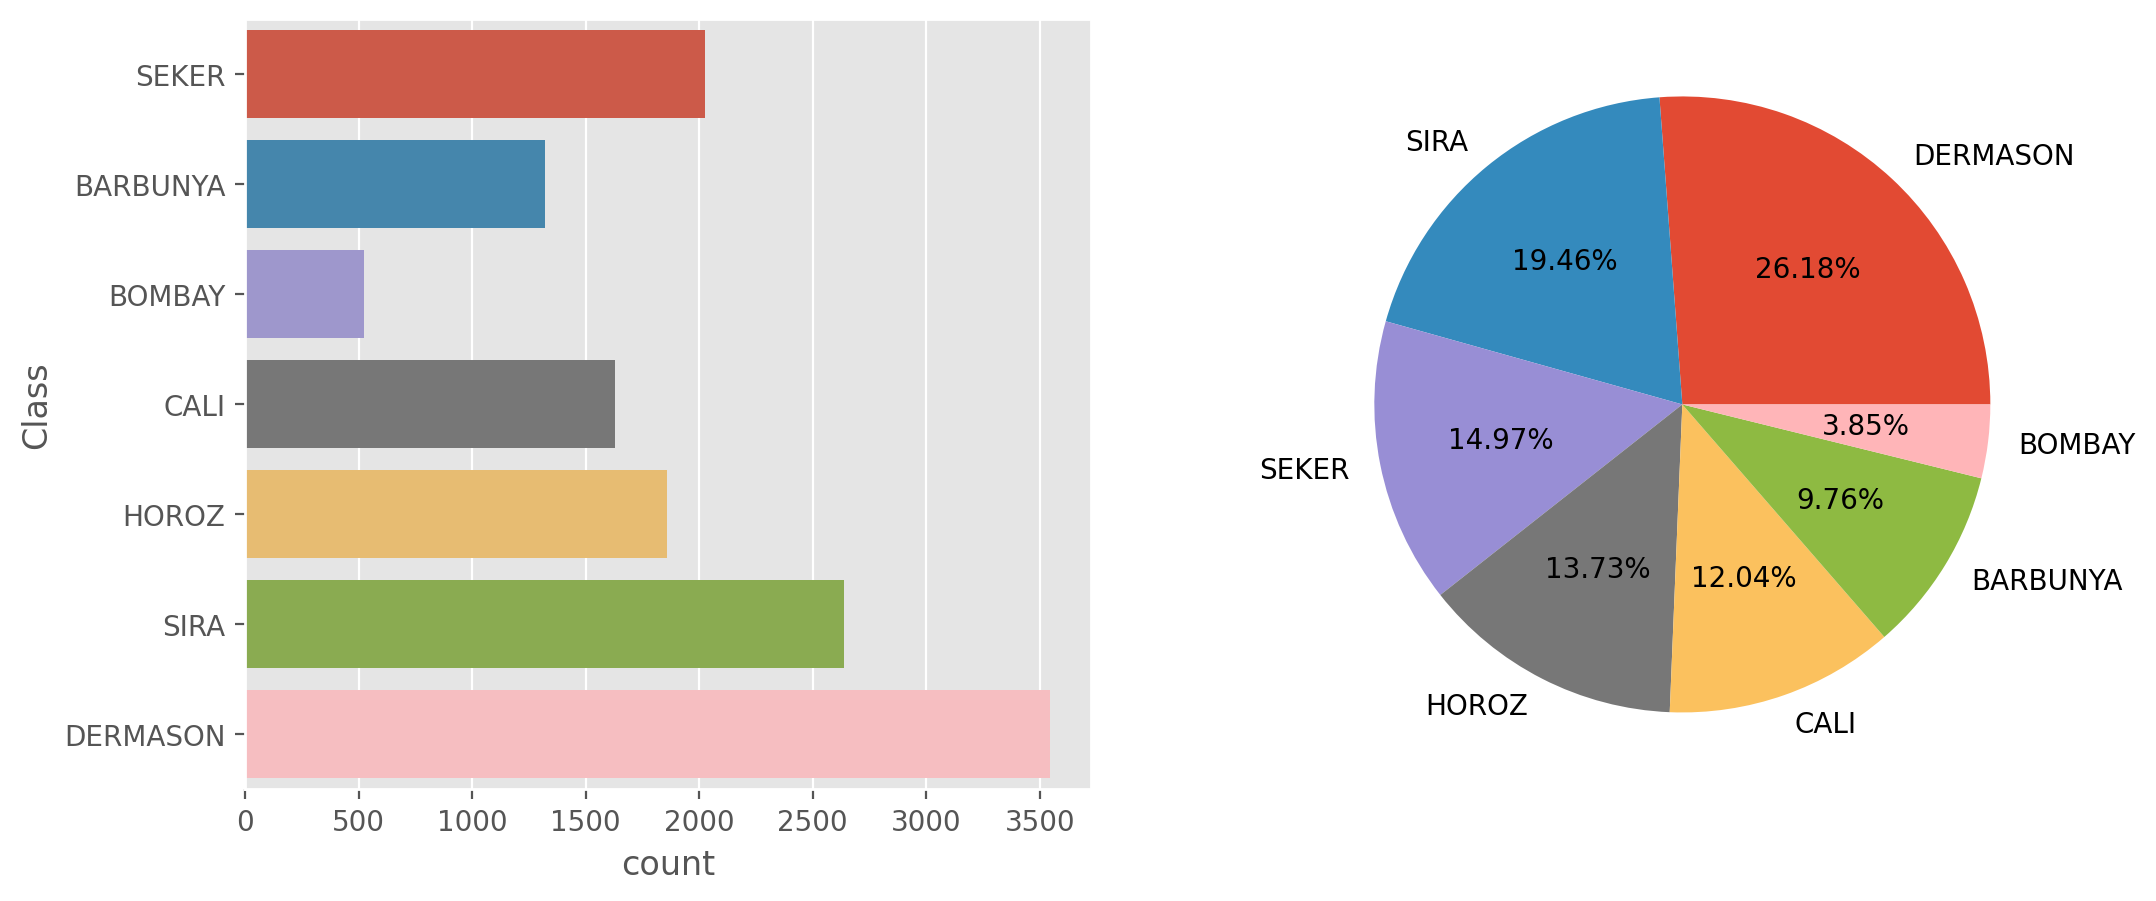

In [13]:
plt.figure(figsize=(12,5),dpi=200)

plt.subplot(1,2,1)
sns.countplot(y=data.Class)

plt.subplot(1,2,2)
plt.pie(x, labels = y, autopct = '%1.2f%%')
plt.show()

## ==========================================================================
### Evaluation of types of dry beans grown from Class column.
- DERMASON is the most appeared dry bean type with a percentage of 26.1 and the dry bean type “BOMBAY” has the minimum 
  percentage of 3.84 percent.
- SIRA is the second highest grown dry bean type with a percentage of 19.46% followed by SEKER, HOROZ, CALI and BARBUNYA with 
  the percentage 14.97, 13.73, 12.04 and 9.76 respectively.


<AxesSubplot:>

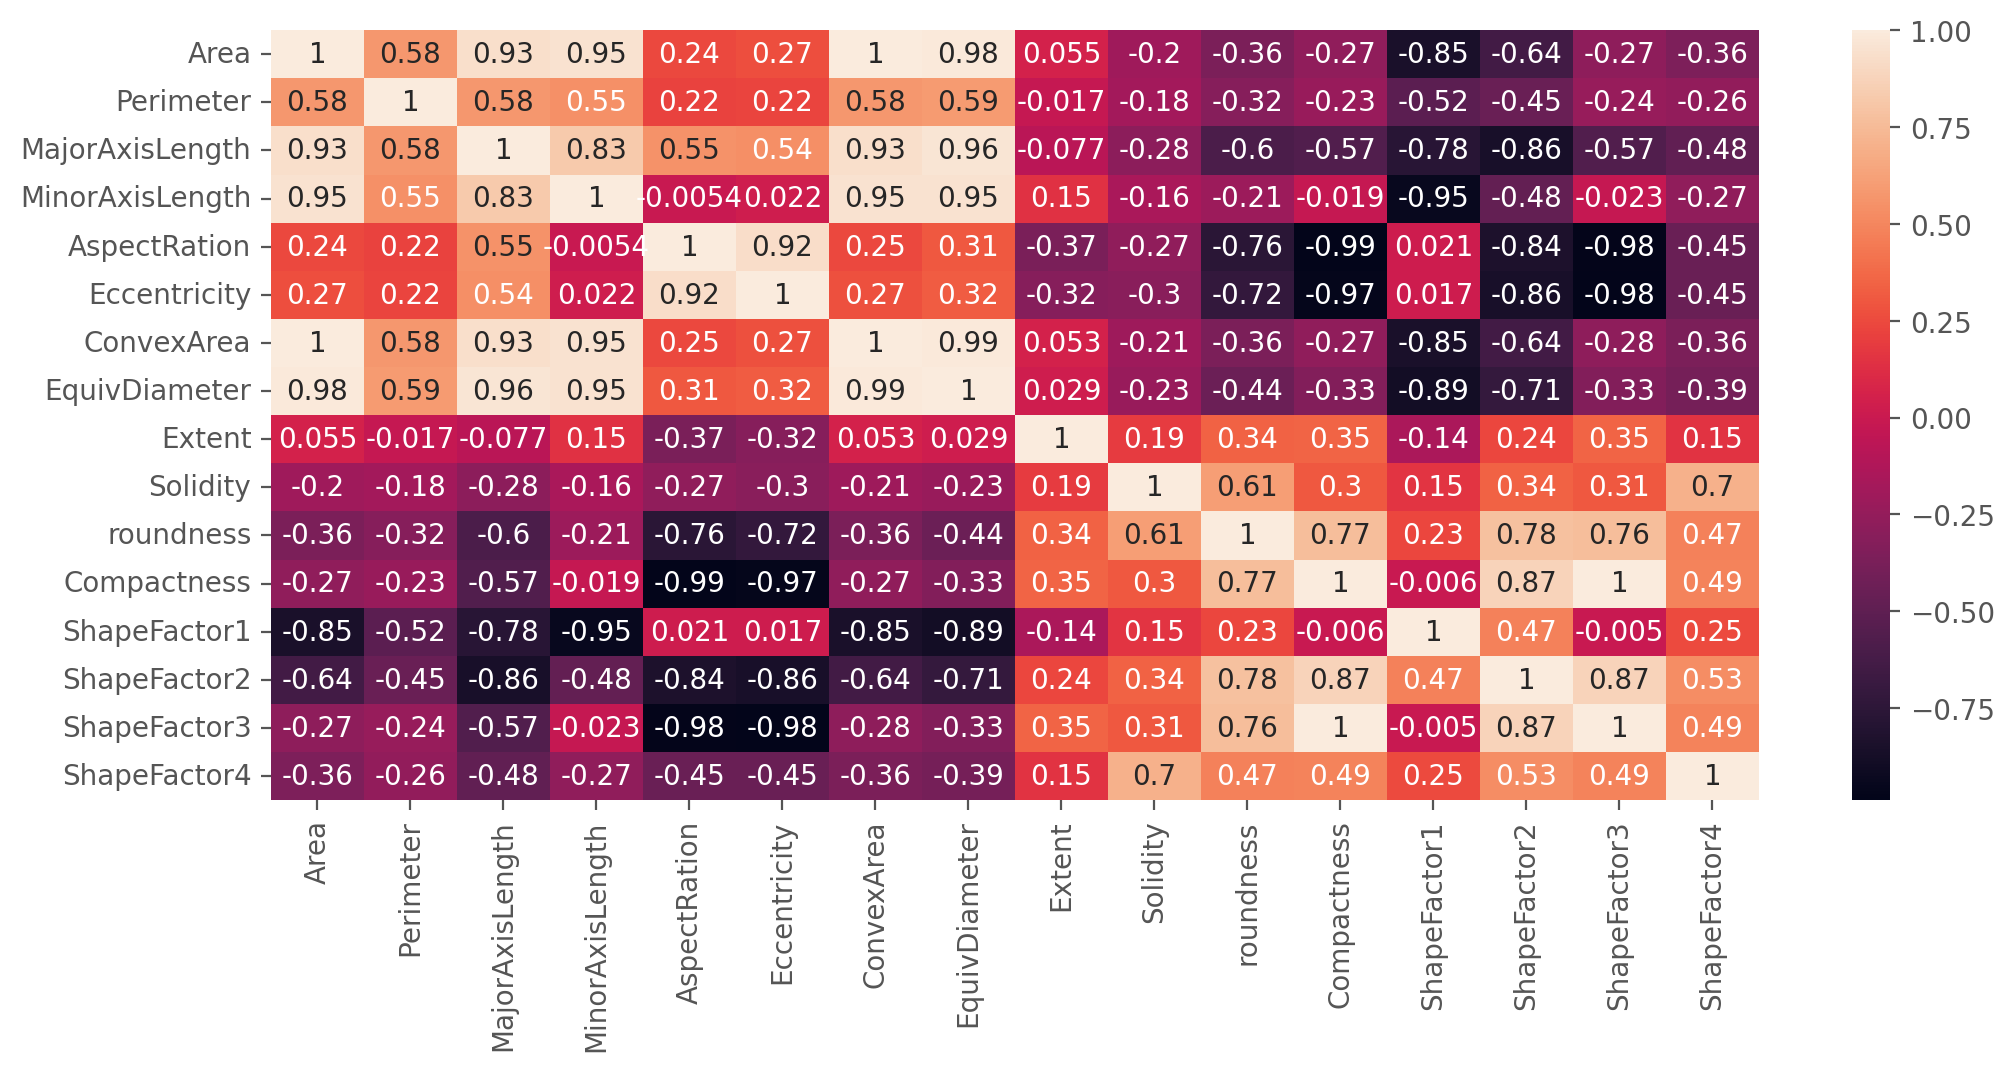

In [14]:
plt.figure(figsize = (12,5), dpi = 200)
sns.heatmap(data.corr(), annot = True)

<AxesSubplot:xlabel='ShapeFactor4', ylabel='Class'>

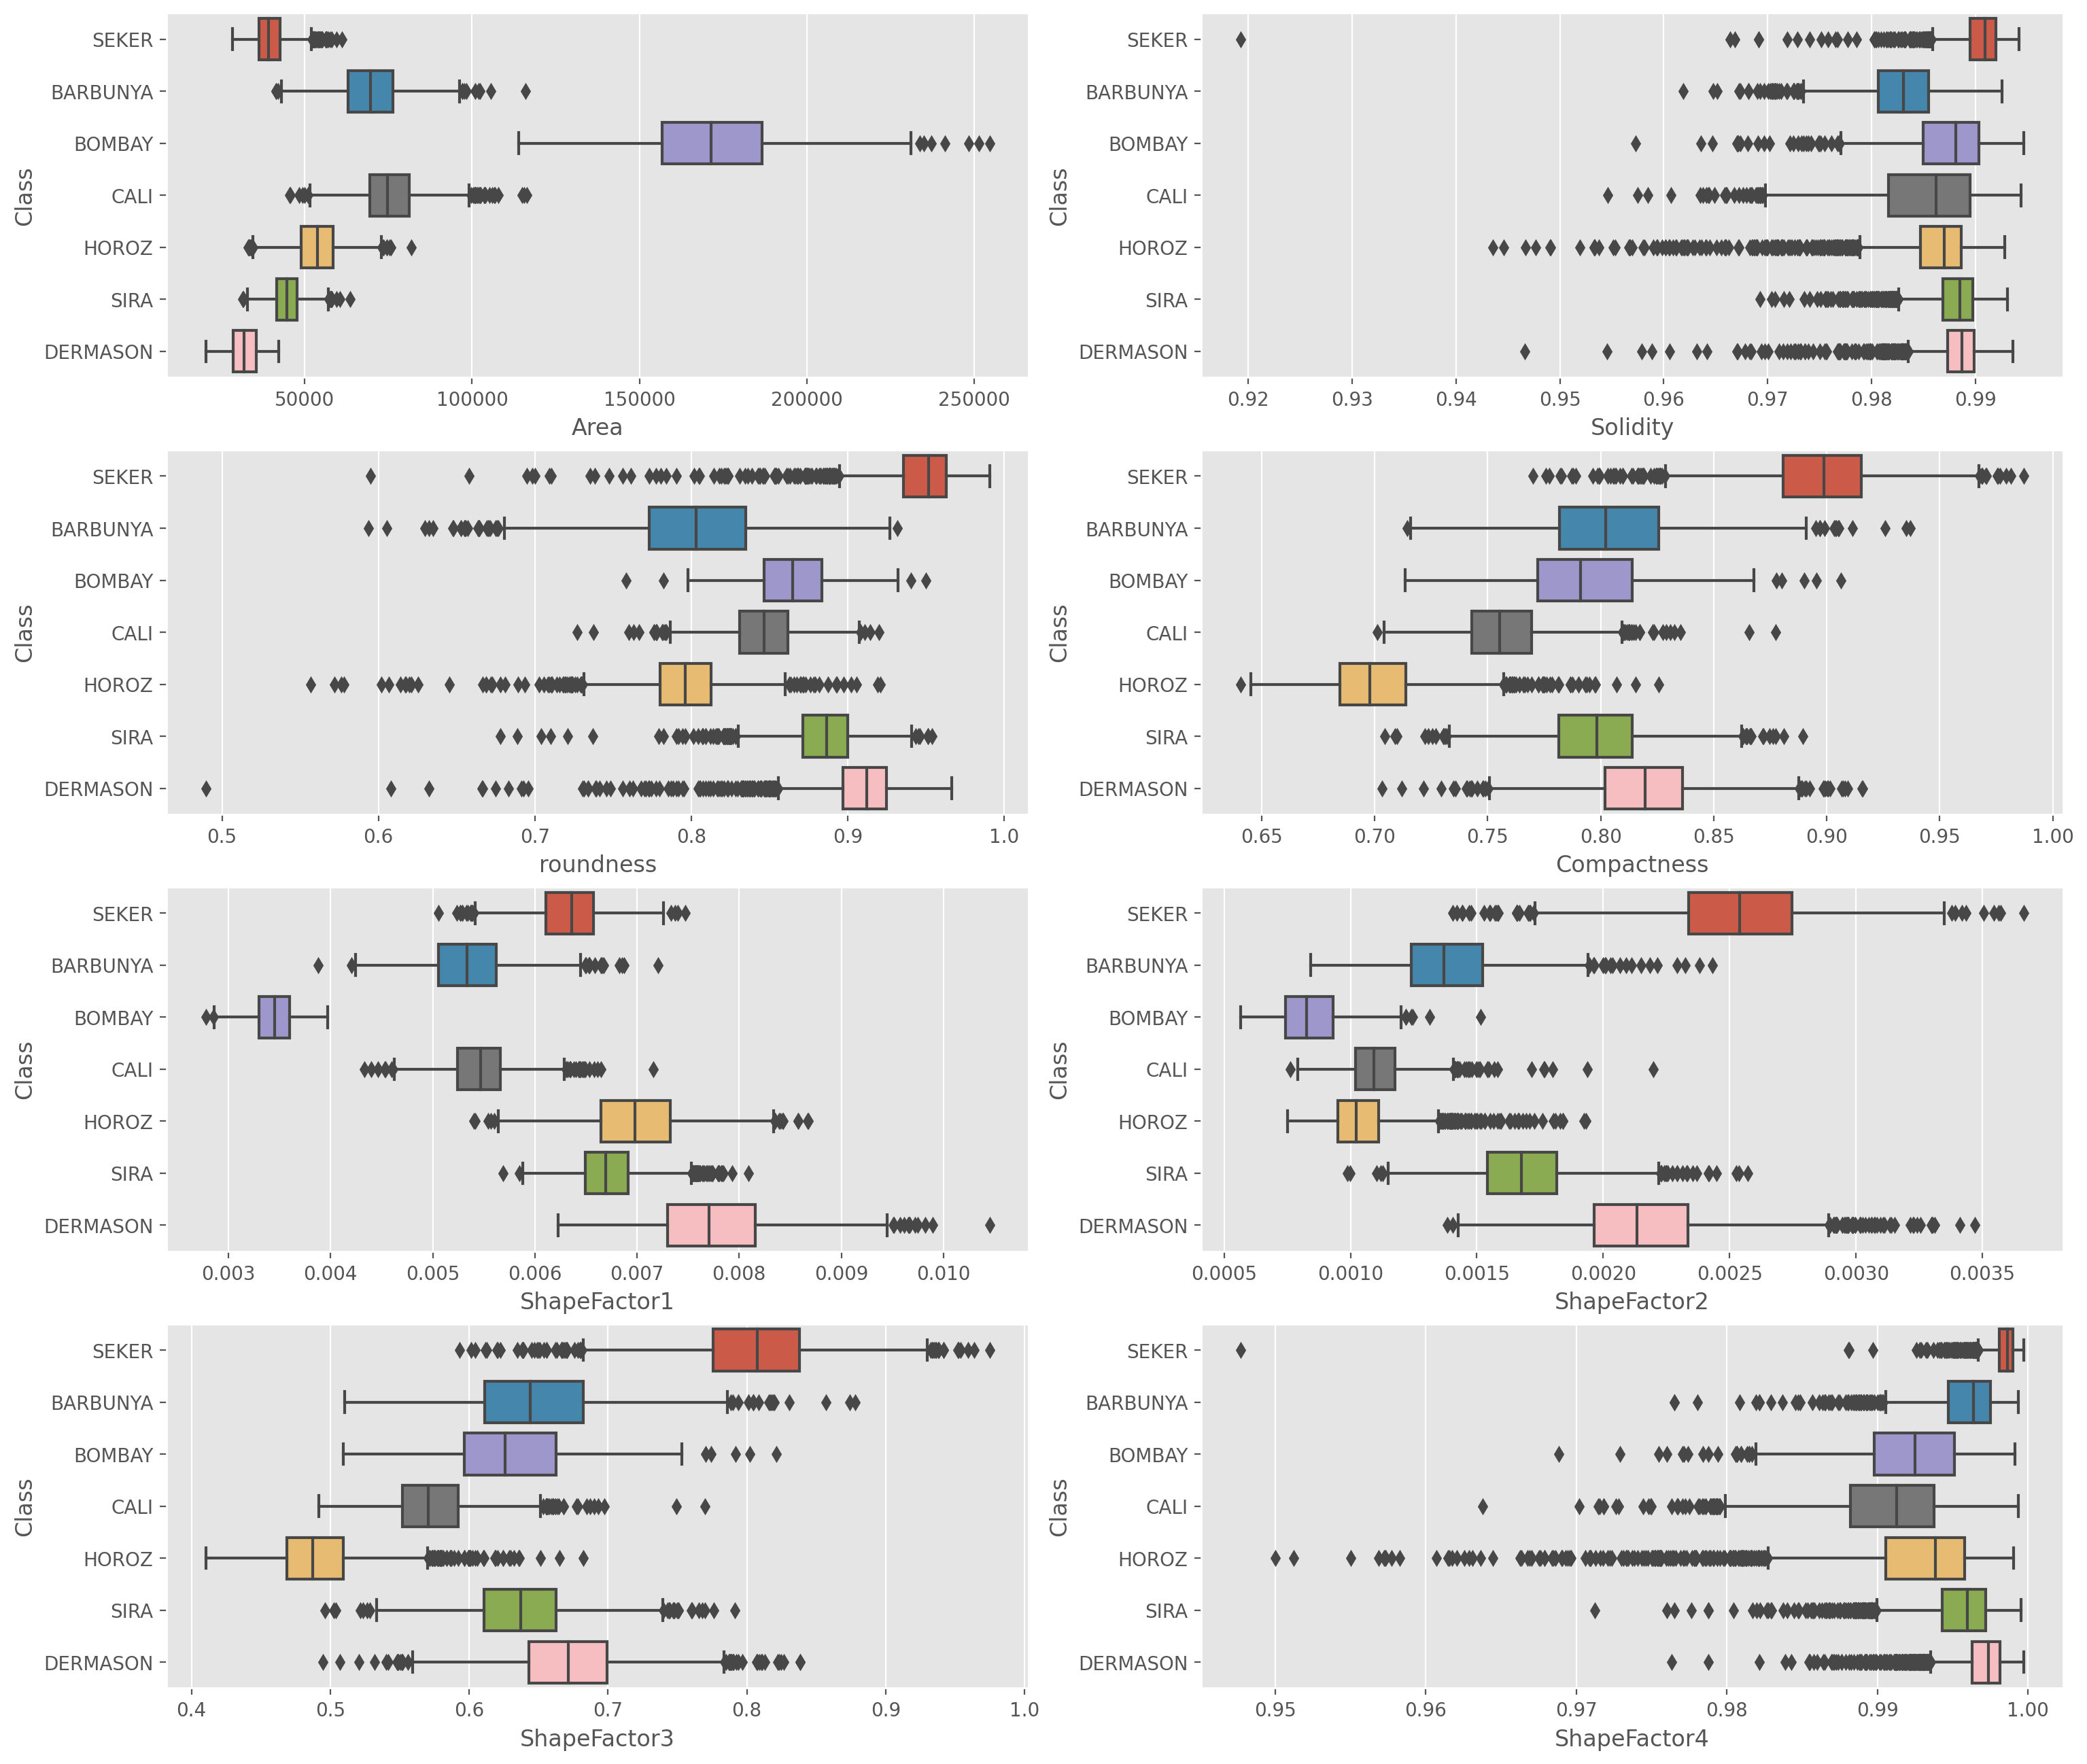

In [15]:
plt.figure(figsize = (18,16), dpi = 200)
plt.subplot(4,2,1)
sns.boxplot(data.Area,data.Class)

plt.subplot(4,2,2)
sns.boxplot(data.Solidity,data.Class)

plt.subplot(4,2,3)
sns.boxplot(data.roundness,data.Class)

plt.subplot(4,2,4)
sns.boxplot(data.Compactness,data.Class)

plt.subplot(4,2,5)
sns.boxplot(data.ShapeFactor1,data.Class)

plt.subplot(4,2,6)
sns.boxplot(data.ShapeFactor2,data.Class)

plt.subplot(4,2,7)
sns.boxplot(data.ShapeFactor3,data.Class)

plt.subplot(4,2,8)
sns.boxplot(data.ShapeFactor4,data.Class)

## ==========================================================================
### Area :
- Dry bean type DERMASON is grown in a smaller area compared to all other dry beans, and still is is the largest grown dry bean 
  type.
- Eventhough BOMBAY dry bean type is the least produced it is grown in the largest area.

<Figure size 2400x1000 with 0 Axes>

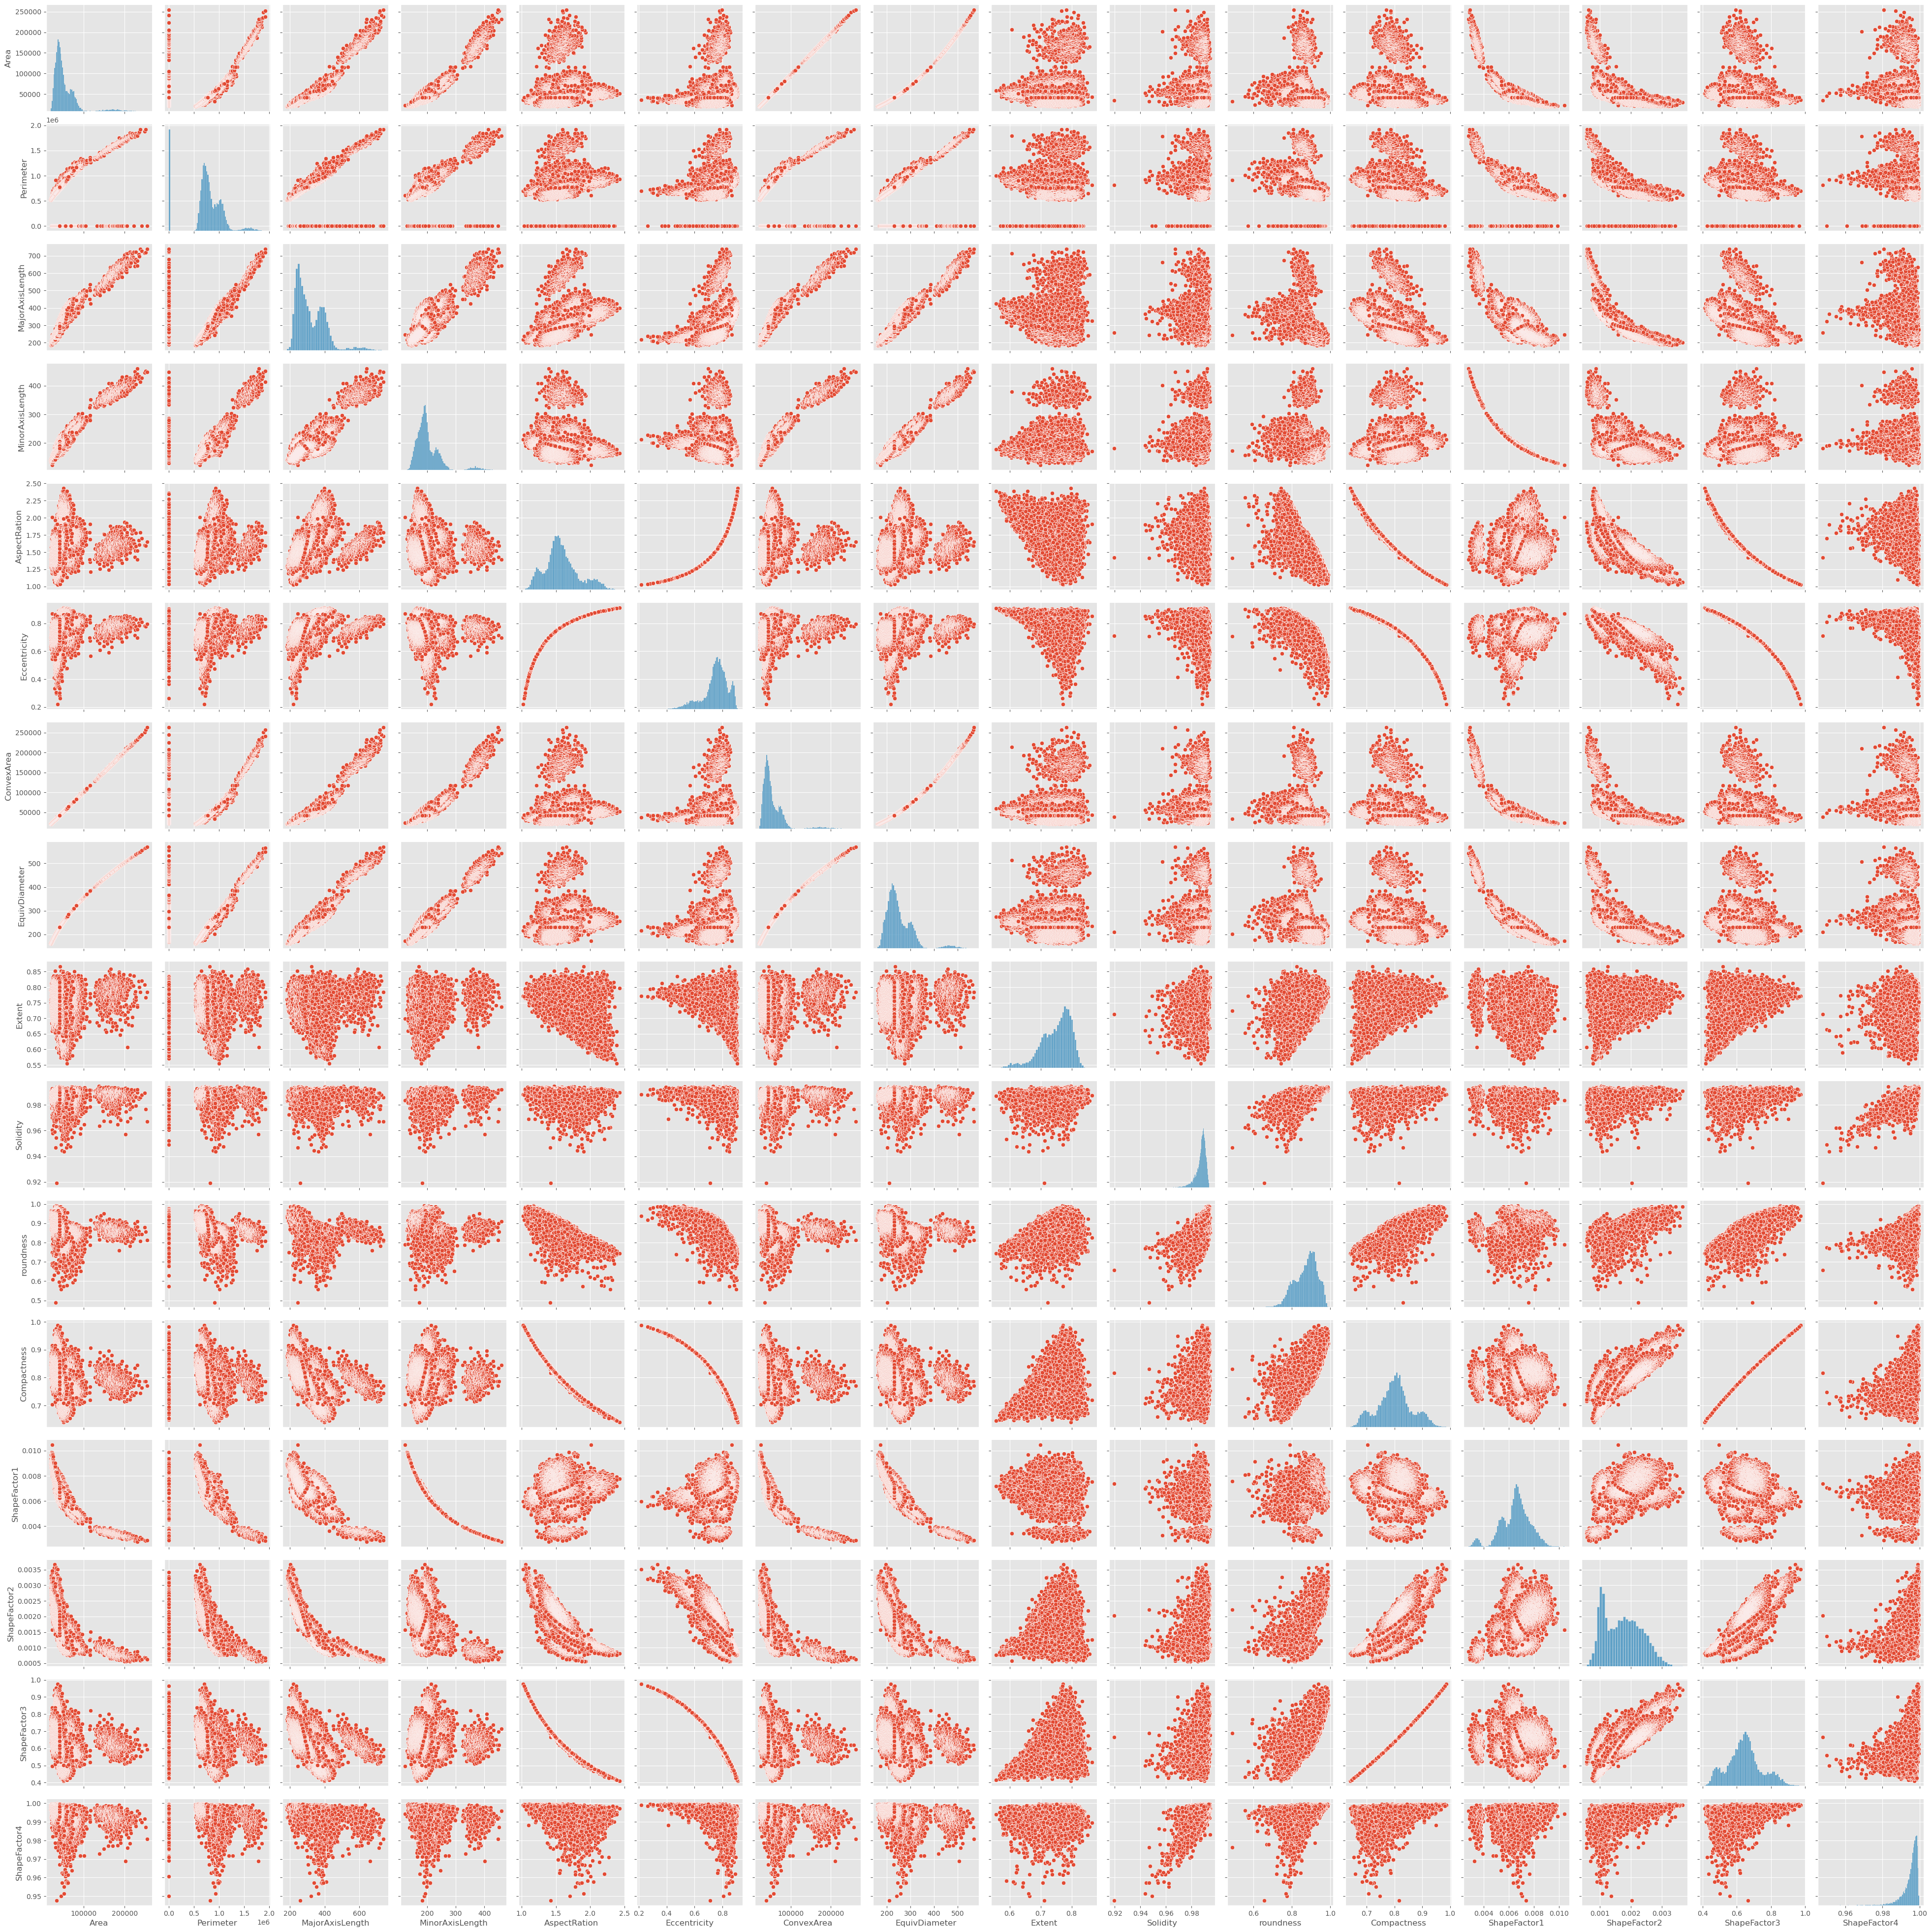

In [27]:
plt.figure(figsize=(12,5),dpi=200)
sns.pairplot(data)

# Seperating the dataset into independent and dependent features

In [16]:
X = data.drop('Class', axis =1)
Y = data[['Class']]

print('Independent Feature Set Shape : ', X.shape)
print('Dependent Feature Set Shape   : ', Y.shape)

Independent Feature Set Shape :  (13543, 16)
Dependent Feature Set Shape   :  (13543, 1)


## Data Preprocessing

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(data.drop('Class', axis =1))


## Splitting the data into training and test sets

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [19]:
print('Training data shape   : ', x_train.shape)
print('Training labels shape : ', y_train.shape)
print('Testing data shape    : ', x_test.shape)
print('Testing labels shape  : ', y_test.shape)

Training data shape   :  (10834, 16)
Training labels shape :  (10834, 1)
Testing data shape    :  (2709, 16)
Testing labels shape  :  (2709, 1)


## Fitting the model with KKN

In [20]:
acc_train = []
acc_test  = []

from sklearn.neighbors import KNeighborsClassifier
for k in range(1,21):
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
    classifier.fit(x_train, y_train)
    
    acc_train.append(classifier.score(x_train, y_train))
    acc_test.append(classifier.score(x_test, y_test))

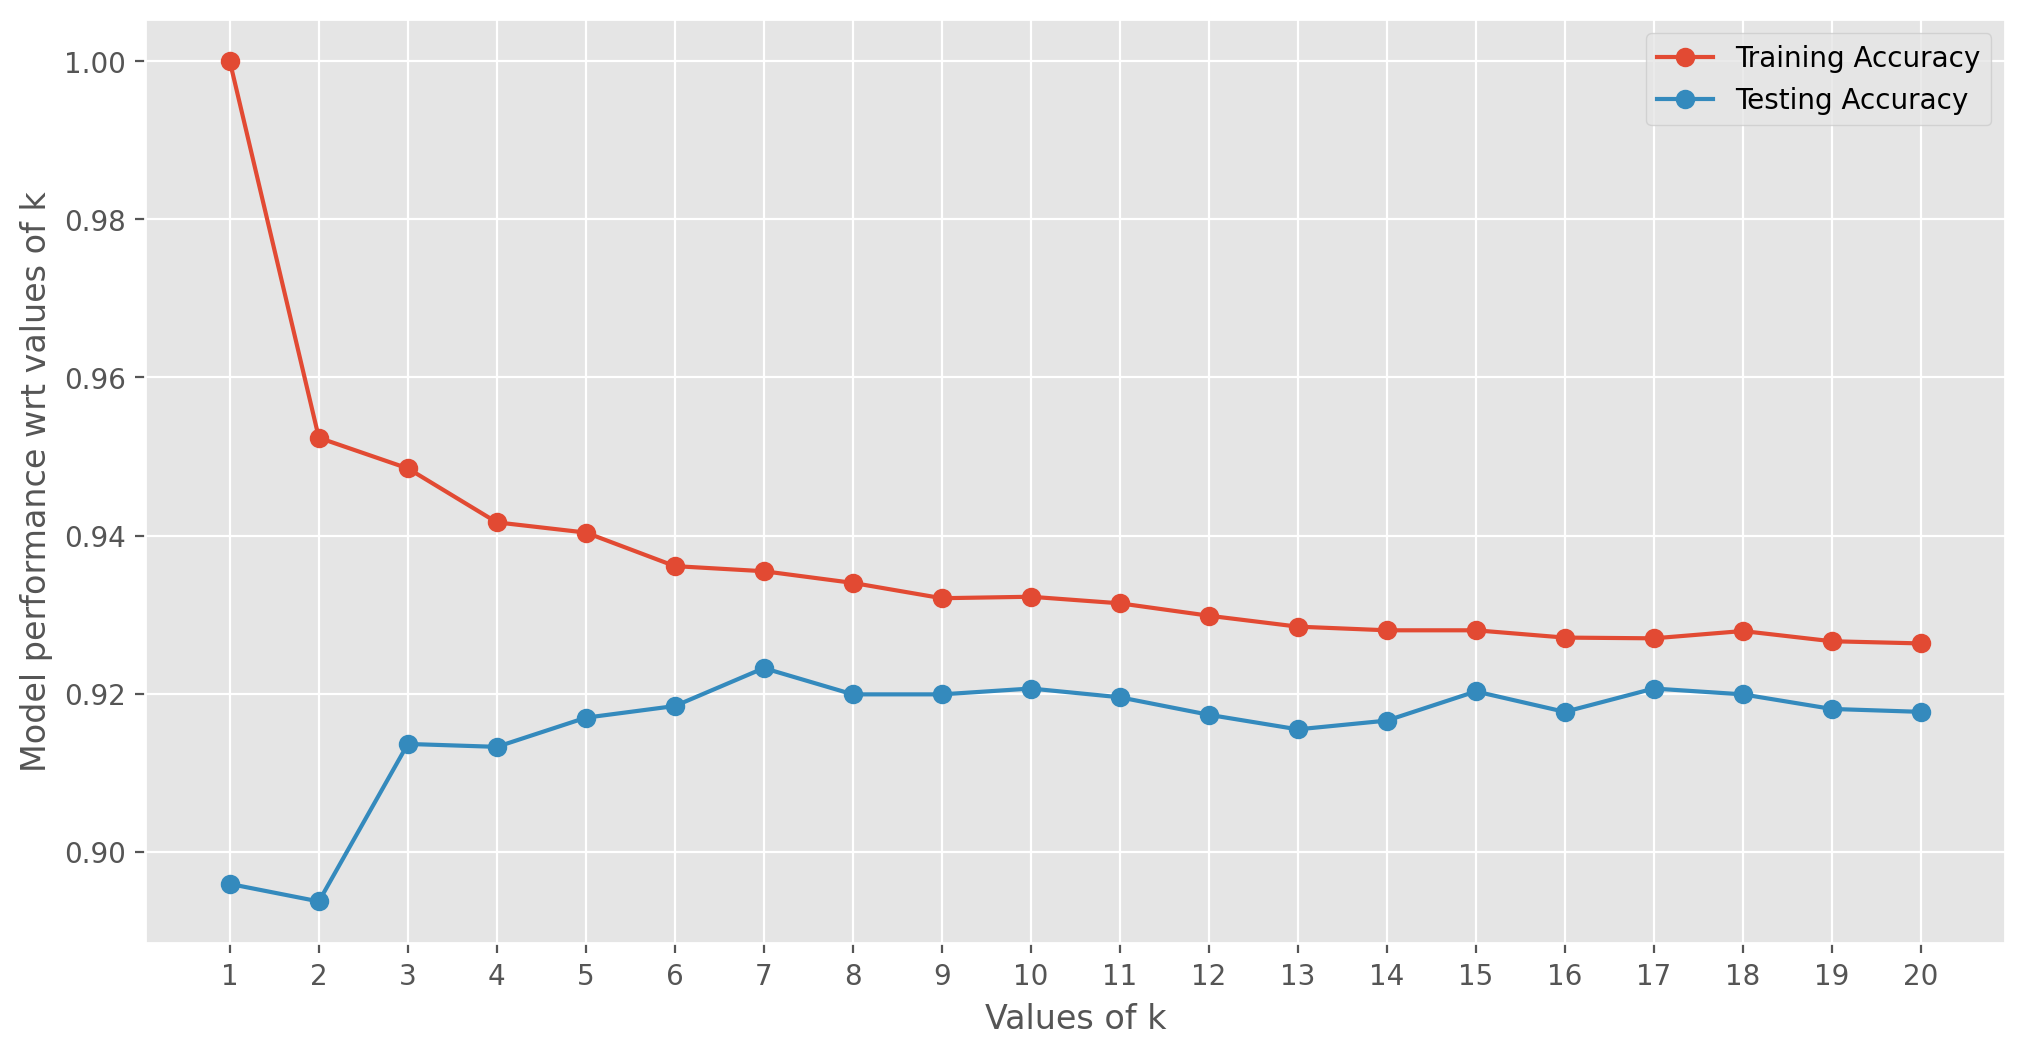

In [21]:
k = range(1,21)

plt.figure(figsize = (12,6), dpi = 200)
plt.plot(k, acc_train, '-o', label = 'Training Accuracy')
plt.plot(k, acc_test,  '-o', label = 'Testing Accuracy')

plt.xticks(k)
plt.xlabel('Values of k')
plt.ylabel('Model performance wrt values of k')
plt.legend()

In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

print('Training Set Score : ', classifier.score(x_train, y_train))
print('Testing Set Score  : ', classifier.score(x_test, y_test))

Training Set Score :  0.935480893483478
Testing Set Score  :  0.923218899963086


In [23]:
pred_train=classifier.predict(x_train)
pred_test=classifier.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score
print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing  Set Accuracy : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  0.935480893483478
Testing  Set Accuracy :  0.923218899963086


In [25]:
classifier.predict(x_test[:10])

array(['HOROZ', 'DERMASON', 'HOROZ', 'DERMASON', 'DERMASON', 'DERMASON',
       'SIRA', 'SEKER', 'CALI', 'SEKER'], dtype=object)

In [26]:
y_test[:10]

Class
6581      HOROZ
13365  DERMASON
7261      HOROZ
7620       SIRA
11297  DERMASON
12932  DERMASON
8775       SIRA
687       SEKER
2828   BARBUNYA
1828      SEKER

## ----------------------------------------------------------------------------------------------------------------------------------
### Using the KKN model we got an accuracy of around 93.5% in training sets and 92% in testing sets which shows it is a perfect model for fitting in the dry bean dataset.
## ----------------------------------------------------------------------------------------------------------------------------------